# Comparison of Various Beach Locations in Florida
Coursera IBM Data Science Professional Certification - Capstone Project

## Table of contents
* [Introduction](#Introduction)
* [Data](#Data)
* [Methodology](#Methodology)
* [Analysis](#Analysis)
* [Results and Discussion](#Results)
* [Conclusion](#Conclusion)

## Introduction

Florida is known worldwide as the **“Sunshine State”** and with its abundance of amusement parks and beaches is a vacation destination throughout the year for people from all over the world. For many families, couples or individuals, the beaches provide a huge draw to the state. Each come for different reasons and this report is designed to provide guidance on the best beach locations based on their vacation wants and needs.

Four different beach areas have been identified near airports – **Tampa (Clearwater area), West Palm Beach, Jacksonville and Pensacola (the Panhandle)**. This report will help to categorize each of the areas as family-oriented, romantic, or a “party” type of atmosphere, based on the number and types of restaurants, bars, parks and other types of venues nearby each of the beach areas selected.

This report’s audience is anyone that is interested in visiting Florida beaches and wanting additional information to decide which region would be best based on their travel companions and plans.


## Data

Based on definition of our problem:
    
*  Beach areas will be defined based on a group of cities within certain latitude/ longitude coordinates. 
*  Factors that will influence our decision are number and type of restaurants, bars, parks, amusement areas, etc. in each of the beach areas

We will be using the following data and data sources to perform the beach area analysis:
    
*  Latitudes and Longitudes of Florida Cities table from the website https://www.mapsofworld.com/usa/states/florida/lat-long.html
*  Foursquare API to provide details on nearby venues for each of the cities in the defined beach areas.


The latitudes and longitudes data will be used to map out the specific cities in the beach areas selected in the introduction above. The data will be scraped from the website, cleansed for use in the analysis and categorized by beach area determined by latitude and longitude coordinates.

The Foursquare API will be used to extract the venues for each of the beach areas. The data will be categorized by venue type (i.e, family restaurant, bar, park, amusement area, etc) to determine which beach area seems to cater to which types of travelers.


## Methodology

The first step to performing the analysis is to install/ import the appropriate libraries and packages.

In [ ]:
!pip install requests
!pip install bs4
!pip install requests
!pip install geopy
!pip install folium==0.5.0

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import folium # plotting library
import json # library to handle JSON files
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# this module helps in web scrapping.
from bs4 import BeautifulSoup 

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# tranform JSON file into a pandas dataframe
from pandas import json_normalize 
from pandas.io.json import json_normalize 

# import k-means from clustering stage
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Libraries imported.')

Next we need to scrape the data from the website and cleanse the data.

In [4]:
#webscrape/ save to dataframe

from unicodedata import normalize
table_FL = pd.read_html('https://www.mapsofworld.com/usa/states/florida/lat-long.html', match='Location')
#table_FL
df_Florida= table_FL[0]

In [5]:
#remove multi indexing

df_Florida.columns = df_Florida.columns.map(''.join)

In [6]:
#rename the columns

df_Florida = df_Florida.rename(columns = {'LocationLocation':'City', 'LatitudeLatitude':'Lat', 'LongitudeLongitude':'Long'})

In [7]:
#delete rows with NaN in any column

df_Florida = df_Florida.dropna()

In [8]:
#convert Long to a float

df_Florida['Long']= df_Florida['Long'].astype(float)

Once the Florida dataframe is created and cleansed, we can extract the data into smaller dataframes. The beach areas are:<br>
    *  Tampa <br>
    *  Jacksonville <br>
    *  West Palm Beach <br>
    *  The Florida Panhandle <br>
The areas are defined by their lattitude and longitude values.

In [ ]:
#create a subset of data - Tampa/ Clearwater - check number of rows
#starting with latitude >=27 and < 28 AND longitude is >=-83 and < -82 and modifying to limit number of cities

df_TPA = df_Florida[(df_Florida['Lat'] >= 27) & (df_Florida['Lat'] < 28)& (df_Florida['Long'] >= -83) & (df_Florida['Long'] < -82.75)]
df_TPA['Beach_Area']='TPA'

In [ ]:
#Create a subset - WPB - check number of rows
#starting with latitude >=26 and < 27 AND longitude is >=-81 and < -80 and modifying to limit number of cities
df_WPB = df_Florida[(df_Florida['Lat'] >= 26.25) & (df_Florida['Lat'] < 27)& (df_Florida['Long'] >= -80.1) & (df_Florida['Long'] < -80)]
df_WPB['Beach_Area']='WPB'

In [ ]:
#Create a subset - Jax - check number of rows
#starting with latitude >=30 and < 31 AND longitude is >=-82 and < -81 and modifying to limit number of cities
df_JAX = df_Florida[(df_Florida['Lat'] >= 30) & (df_Florida['Lat'] < 31)& (df_Florida['Long'] >= -81.5) & (df_Florida['Long'] < -81)]
df_JAX['Beach_Area']='JAX'

In [ ]:
#Create a subset - Panhandle - check number of rows
#starting with latitude >=30 and < 30.5 AND longitude is >=-87.5 and < -85 and modifying to limit number of cities
df_PH = df_Florida[(df_Florida['Lat'] >= 30) & (df_Florida['Lat'] < 30.5)& (df_Florida['Long'] >= -87.5) & (df_Florida['Long'] < -85)]
df_PH['Beach_Area']='PHL'

We then combine the individual beach area dataframes into a single dataframe that includes only the cities we want to include in our analysis.

In [13]:
#create a dataframe of just the beach areas
df_Beaches = df_TPA.append(df_WPB, ignore_index=True)
df_Beaches = df_Beaches.append(df_JAX, ignore_index=True)
df_Beaches = df_Beaches.append(df_PH, ignore_index=True)

We will map each of the cities in the beach areas and color code the cities by area. Tampa is blue, West Palm Beach is red, Jacksonville is purple and the Panhandle is green.

In [14]:
#create map of Beach areas area using latitude and longitude values

address = ("Florida")
geolocator = Nominatim(user_agent="fl_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
beach = df_Beaches ['Beach_Area']

map_Beaches = folium.Map(location=[latitude, longitude], zoom_start=7)

# add markers to map - each marker corresponds to a city withing the designated beach area. The beach areas are color coded - Tampa (blur), West Palm Beach (Red)
# Jacksonville (purple) and the panhandle (green)
for lat, lng, label, beach in zip(df_Beaches['Lat'], df_Beaches['Long'], df_Beaches['City'],df_Beaches['Beach_Area']):
    if beach == 'TPA':
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue'
            ).add_to(map_Beaches) 
    elif beach == 'WPB':
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red'
            ).add_to(map_Beaches) 
    elif beach == 'JAX':
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='purple'
            ).add_to(map_Beaches) 
    else:
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='green'
            ).add_to(map_Beaches) 

map_Beaches

We will use the Foursquare API to get information for each of the beach areas to be reviewed.

First we must define Foursquare credentials, version and other variables

In [500]:
CLIENT_ID = 'CGHMWJNKEIUKQRW0YQ2NVVQRFFMHQJZMFUCXXAOQT2DQBHD1' # your Foursquare ID
CLIENT_SECRET = 'LNRD13VQBVEZWBNBEIYHHHIL2JXRHBFJFA2JJ4DKLLENDMTJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 10000 # A default Foursquare API limit value
radius = 1000

Next we define and call a function to get a list of venues for the selected beach areas

In [501]:
def getNearbyVenues(names, beaches, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, beach, lat, lng in zip(names, beaches, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            beach,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Beach_Area',
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [ ]:
beach_venues = getNearbyVenues(names=df_Beaches['City'],
                               beaches=df_Beaches['Beach_Area'],
                               latitudes=df_Beaches['Lat'],
                               longitudes=df_Beaches['Long']
                              )

We need to look at the number of venue categories returned and determine if that is a useable population.

In [503]:
print('There are {} uniques categories.'.format(len(beach_venues['Venue_Category'].unique())))

There are 239 uniques categories.


Over 200 categories is not manageable, therefore we will include only the venue categories that have the highest frequence of occurance across all beach areas to be included in our analysis. 

First we will create a dataframe that will show the number of venues by category. This dataframe is across all beach areas.

In [504]:
# view the number of venues by beach area
Num_venues = beach_venues.groupby('Venue_Category').count()

Next we will create a dataframe of only the top 20 venue categories across all beach areas.

In [505]:
#get the top 20 venue categories for all beach areas selected
Top_20 = Num_venues.nlargest(20, ['City'])

Finally we will create a dataframe of only the top 20 venue categories. This is the dataframe will will use to analyze the types of venues that are available in each of the beach areas.

In [506]:
# create a new dataframe that includes only the venue categories included in the top 20 venue categories
beach_venues_top_20 = beach_venues[beach_venues['Venue_Category'].isin(Top_20.index)]
beach_venues_top_20.shape

(682, 8)

Using the dataframe above, we will use one hot encoding to show the number of category venues in each of the beach areas selected. 

In [507]:
# one hot encoding will show the 
beach_onehot = pd.get_dummies(beach_venues_top_20[['Venue_Category']], prefix="", prefix_sep="")

# add beach area column back to dataframe
beach_onehot['Beach_Area'] = beach_venues['Beach_Area'] 

# move neighborhood column to the first column
fixed_columns = [beach_onehot.columns[-1]] + list(beach_onehot.columns[:-1])
beach_onehot = beach_onehot[fixed_columns]

#group by beach area to get an idea of the types of venue categories by beach area
beach_grouped = beach_onehot.groupby("Beach_Area").sum().reset_index()
#beach_grouped.set_index("Beach_Area", inplace = True)
 
beach_grouped

,Beach_Area,American Restaurant,Bar,Beach,Breakfast Spot,Coffee Shop,Convenience Store,Discount Store,Fast Food Restaurant,Gas Station,Golf Course,Grocery Store,Harbor / Marina,Hotel,Italian Restaurant,Park,Pharmacy,Pizza Place,Resort,Sandwich Place,Seafood Restaurant
0,JAX,5,0,1,0,1,1,3,0,1,16,2,1,2,3,1,1,2,1,1,0
1,PHL,11,5,11,9,4,15,18,19,10,1,10,9,12,4,7,14,14,16,16,17
2,TPA,9,11,20,6,6,7,2,7,3,4,7,6,19,3,15,6,11,15,3,13
3,WPB,16,7,22,5,10,9,11,18,6,6,14,13,15,11,17,13,12,4,18,18


In [508]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

We will then create and call a function to show the top five venue category for each of the beach areas.

In [509]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Beach_Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
beach_venues_sorted = pd.DataFrame(columns=columns)
beach_venues_sorted['Beach_Area'] = beach_grouped['Beach_Area']

for ind in np.arange(beach_grouped.shape[0]):
    beach_venues_sorted.iloc[ind, 1:] = return_most_common_venues(beach_grouped.iloc[ind, :], num_top_venues)

beach_venues_sorted.head()

,Beach_Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,JAX,Golf Course,American Restaurant,Italian Restaurant,Discount Store,Pizza Place
1,PHL,Fast Food Restaurant,Discount Store,Seafood Restaurant,Sandwich Place,Resort
2,TPA,Beach,Hotel,Resort,Park,Seafood Restaurant
3,WPB,Beach,Seafood Restaurant,Fast Food Restaurant,Sandwich Place,Park


Following is a second view of the top 5 venue categories by beach area with the number of occurrances.

In [511]:
num_top_venues = 5

for hood in beach_grouped['Beach_Area']:
    print("----"+hood+"----")
    temp = beach_grouped[beach_grouped['Beach_Area'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----JAX----
                 venue  freq
0          Golf Course  16.0
1  American Restaurant   5.0
2       Discount Store   3.0
3   Italian Restaurant   3.0
4          Pizza Place   2.0


----PHL----
                  venue  freq
0  Fast Food Restaurant  19.0
1        Discount Store  18.0
2    Seafood Restaurant  17.0
3        Sandwich Place  16.0
4                Resort  16.0


----TPA----
                venue  freq
0               Beach  20.0
1               Hotel  19.0
2              Resort  15.0
3                Park  15.0
4  Seafood Restaurant  13.0


----WPB----
                  venue  freq
0                 Beach  22.0
1    Seafood Restaurant  18.0
2  Fast Food Restaurant  18.0
3        Sandwich Place  18.0
4                  Park  17.0




We are going to create a dataframe that includes only the veue categories in the top 5 of each of the Beach areas.

In [515]:
top_5_graph_data = beach_venues_top_20[beach_venues_top_20['Venue_Category'].isin(['American Restaurant','Beach','Discount Store','Fast Food Restaurant','Golf Course','Hotel','Italian Restaurant','Park','Pizza Place','Resort','Sandwich Place','Seafood Restaurant'])]


Using one hot encoding we will create a dataframe that will be used for creating a graph. 

In [518]:
# one hot encoding will show the 
beach_top_5_onehot = pd.get_dummies(top_5_graph_data[['Venue_Category']], prefix="", prefix_sep="")

# add beach area column back to dataframe
beach_top_5_onehot['Beach_Area'] = top_5_graph_data['Beach_Area'] 

# move neighborhood column to the first column
fixed_columns = [beach_top_5_onehot.columns[-1]] + list(beach_top_5_onehot.columns[:-1])
beach_top_5_onehot = beach_top_5_onehot[fixed_columns]

#group by beach area to get an idea of the types of venue categories by beach area
top_5_grouped = beach_top_5_onehot.groupby("Beach_Area").sum().reset_index()
#beach_grouped.set_index("Beach_Area", inplace = True)
 
top_5_grouped = top_5_grouped.set_index('Beach_Area')
top_5_grouped

,American Restaurant,Beach,Discount Store,Fast Food Restaurant,Golf Course,Hotel,Italian Restaurant,Park,Pizza Place,Resort,Sandwich Place,Seafood Restaurant
Beach_Area,,,,,,,,,,,,
JAX,5,1,3,0,16,2,3,1,2,1,1,0
PHL,11,11,18,19,1,12,4,7,14,16,16,17
TPA,9,20,2,7,4,19,3,15,11,15,3,13
WPB,16,22,11,18,6,15,11,17,12,4,18,18


Text(0.5, 1.0, 'Venues by Beach Area')

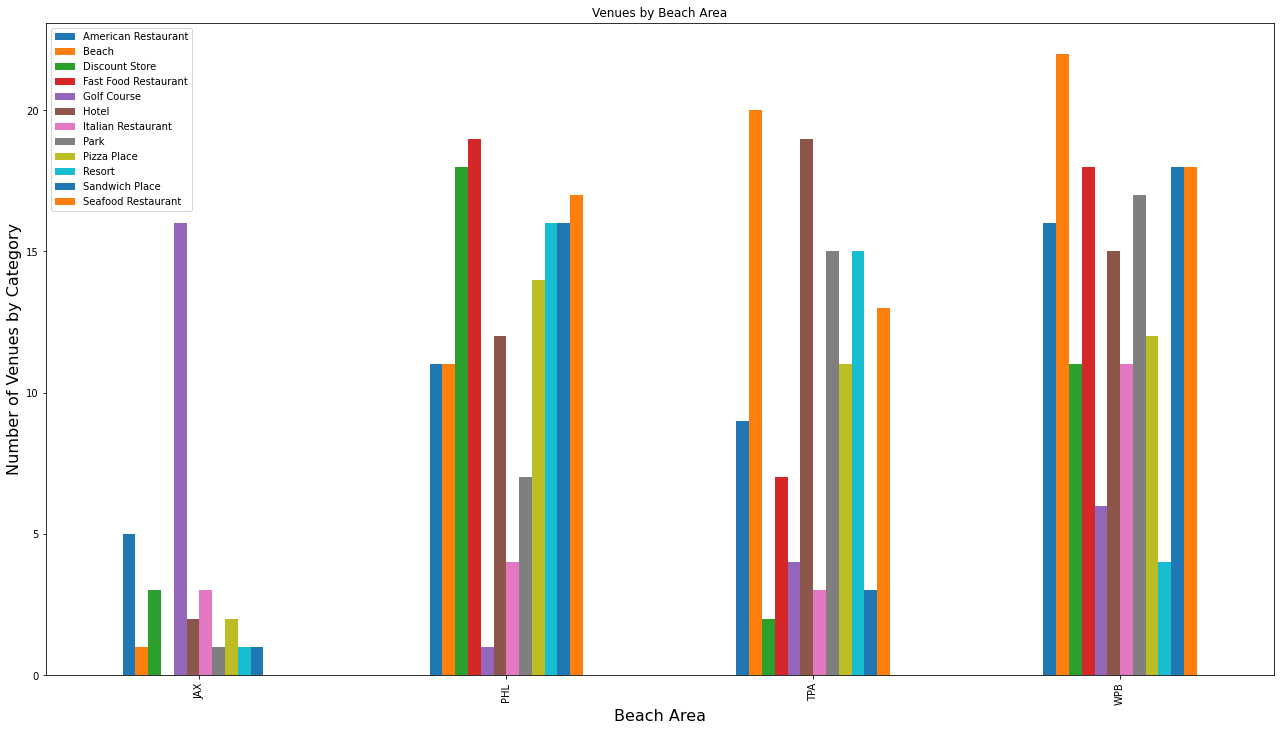

In [519]:
#create a grpah showing the number of venue categories for each of the beach areas
top_5_grouped.plot(kind='bar',figsize=(22, 12))
plt.xlabel('Beach Area', fontsize=16)
plt.ylabel('Number of Venues by Category', fontsize=16)
plt.title("Venues by Beach Area")

## Analysis

We started out with a list of 920 cities in the state of Florida. After reviewing a state map that included latitude and longitude values, we divided this list into four different beach areas. There were 18 cities in the Tampa/ Clearwater region, 33 cities in the West Palm Beach region, 7 in the Jacksonville region and 43 in the Panhandle region.  A map of the regions is displayed above. The number of cities greatly varies by area, however that is another indication of the type of vacation once could expect to have in those locations.

The results of the data slicing clearly show that the largest number of cities are in the West Palm Beach and Panhandle areas. As you can also see from the map, we selected four different regions that are on the east coast, west coast, north and south of Florida in order to provide a cross section of the venue availability and differences based on location.

Based on a review of the data, Jacksonville and its surrounding areas have a significantly larger number of golf courses compared to the other beach areas, and a significantly lower number of beach and beach activities than the other beach areas. The second highest number of venues in Jacksonville are its restaurants, with no fast food restaurants reported.

The Panhandle has second largest number of restaurants of varying types. It also has the largest number of hotels and resorts of all of the beach areas researched. The panhandle also has the largest number of convenience and discount stores.

The Tampa/ Clearwater area has the largest number of hotels and resorts and the second highest number of beach locations reported. 

The West Palm Beach has the highest overall number of venues reported.  It has the largest number of beaches and water activities as well as restaurants, however it had surprisingly few hotels and resorts compared to the other beach locations. 

The areas with the largest number of fast food restaurants and sandwich shops are West Palm Beach and the Panhandle. They also have the largest number of seafood restaurants. Not surprisingly, seafood restaurants are the most commonly reported types of restaurants in all of the beach locations except for Jacksonville which had the largest number of American Restaurants.


## Results and Discussion

Based on the analysis of the results of the data collected.  Tampa, West Palm Beach and the Panhandle appear to have the most diverse types of venues which would make them ideal locations for any kind of vacation – family, romantic, friends “get away”.  Both have a large number of restaurants and activities that may be enjoyed by various individuals of all ages. Due to the lower number of hotels and resorts in the West Palm Beach area, individuals or families planning to travel to this area should make plans well in advance to ensure availability. Due to the number of discount and convenience stores in the Panhandle would make the area ideal for individuals or families that enjoy a shopping experience while on vacation. 

Jacksonville had the fewest number of venues all together, however it also had the smallest number of cities reporting venues on Foursquare.  This seems to point to the fact that Jacksonville has not reached the point of a large vacation destination right now. That may be an attractive option for some travelers, so even lack of venues gives an indication of whether an area is desirable for a particular individual or traveling party.


## Conclusion

This analysis could be used as a first step in determining a vacation destination.  Once the high level types of venues are identified as they are in this report, the traveler should begin to go into the venue details for specific types of attractions, accommodations and ratings for venues in which they are interested.